In [1]:
!pip install statsmodels openpyxl

In [4]:
!pip install scikit-learn

In [5]:
conda install -c conda-forge pmdarima

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - pmdarima


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2025.7.9   |       hbd8a1cb_0         149 KB  conda-forge
    certifi-2025.7.9           |     pyhd8ed1ab_0         153 KB  conda-forge
    conda-24.11.3              |  py312h81bd7bf_0         1.1 MB  conda-forge
    cython-3.1.2               |   pyh2c78169_102         883 KB  conda-forge
    libexpat-2.6.3             |       hf9b8971_0          62 KB  conda-forge
    libsqlite-3.46.0           |       hfb93653_0         811 KB  conda-forge
    libzlib-1.2.13             |       hfb2fe0b_6          46 KB  conda-forge
    openssl-3.5.1              |       h81ee809_0         2.9 MB  conda-forge
    pmdarima-2.0.4             |  py312h7e5086

In [7]:
conda install -c conda-forge prophet

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - prophet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    clang-14.0.6               |       hce30654_0         127 KB  conda-forge
    clang-14-14.0.6            |default_h81a5282_0         961 KB  conda-forge
    clang_osx-arm64-14.0.6     |       h15773ab_6          20 KB  conda-forge
    clangxx-14.0.6             |default_hb7ecf47_0         127 KB  conda-forge
    clangxx_osx-arm64-14.0.6   |       he29aa18_6          19 KB  conda-forge
    cmdstan-2.31.0             |       hd06e7c4_0        39.0 MB  conda-forge
    cmdstanpy-1.2.5            |     pyhd8ed1ab_0          69 KB  conda-forge
    compiler-rt-14.0.6         |       h30b49de_0          83 KB  conda-forge
    compiler-rt_osx-arm64-14.0.6|       h4830

In [3]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

#### Loading Data and Preprocessing

In [7]:
# Load the Excel file (handle header rows if needed)
df = pd.read_excel("AirQualityUCI.xlsx")

In [9]:
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [6]:
# Load the Excel file (handle header rows if needed)
df = pd.read_excel("AirQualityUCI.xlsx")

# Check types (you can uncomment this to confirm)
# print(df.dtypes)

# Convert 'Date' and 'Time' to strings (to be safe)
df['Date'] = df['Date'].astype(str)
df['Time'] = df['Time'].astype(str)

df['Datetime'] = pd.to_datetime(
    df['Date'] + ' ' + df['Time'],
    format='%m/%d/%y %H:%M:%S',
    errors='coerce'
)

# Drop rows where datetime conversion failed
df = df.dropna(subset=['Datetime'])

# Set datetime index
df = df.set_index('Datetime')
df.drop(columns=['Date', 'Time'], inplace=True)

# Replace -200 with NaN and interpolate
df.replace(-200, np.nan, inplace=True)
df.interpolate(method='linear', inplace=True)


In [5]:
print(df.dtypes)
print(df.describe())


CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object
            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  3597.000000  3597.000000  3597.000000  3597.000000    3597.000000   
mean      2.181568  1105.635842   271.295524    10.100301     942.853431   
std       1.406611   204.701881    62.958503     7.106595     254.445986   
min       0.100000   689.250000     7.000000     0.164946     386.750000   
25%       1.100000   951.500000   275.000000     4.775057     751.500000   
50%       1.900000  1074.750000   275.000000     8.406517     914.250000   
75%       3.100000  1233.500000   275.000000    13.796488    1108.250000   
max       9.400000  1914.500000  1084.000000    48.21

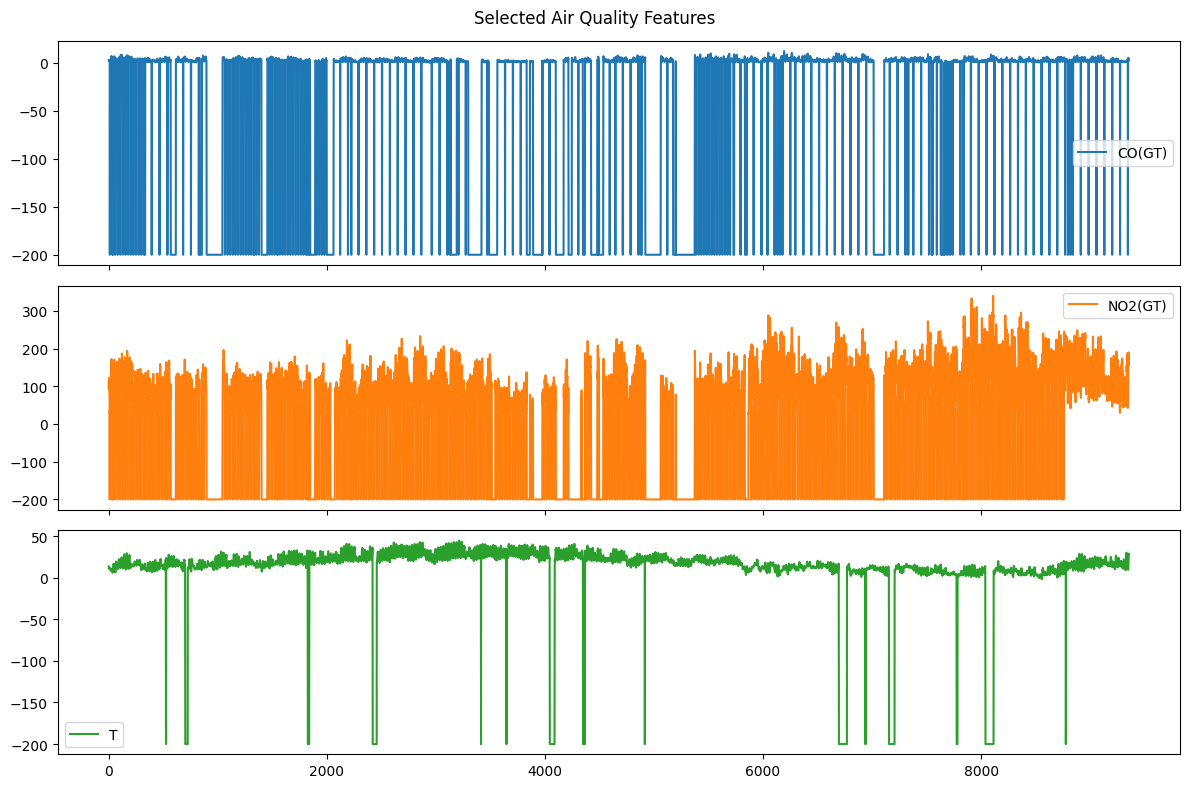

In [17]:
df[['CO(GT)', 'NO2(GT)', 'T']].plot(subplots=True, figsize=(12, 8), title='Selected Air Quality Features')
plt.tight_layout()
plt.show()


/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting

                               SARIMAX Results                                
Dep. Variable:                 CO(GT)   No. Observations:                 3597
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3889.576
Date:                Sat, 03 May 2025   AIC                           7785.152
Time:                        22:37:54   BIC                           7803.714
Sample:                             0   HQIC                          7791.767
                               - 3597                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2491      0.046     -5.364      0.000      -0.340      -0.158
ma.L1          0.4744      0.044     10.771      0.000       0.388       0.561
sigma2         0.5093      0.006     84.089      0.0

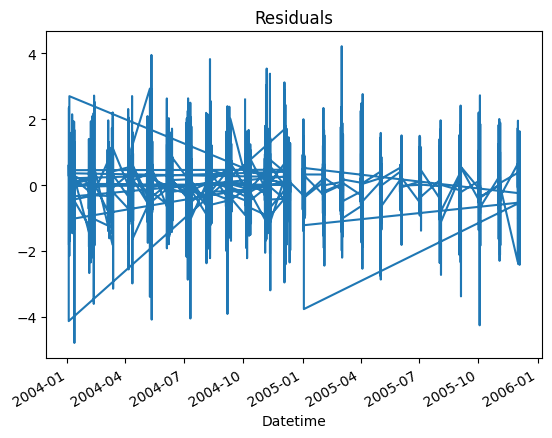

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/var/folders/8j/2bschcy91hl2lzf_yf5v4gb00000gn/T/ipykernel_5139/1532538721.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(df.index[-1], periods=49, freq='H')[1:]


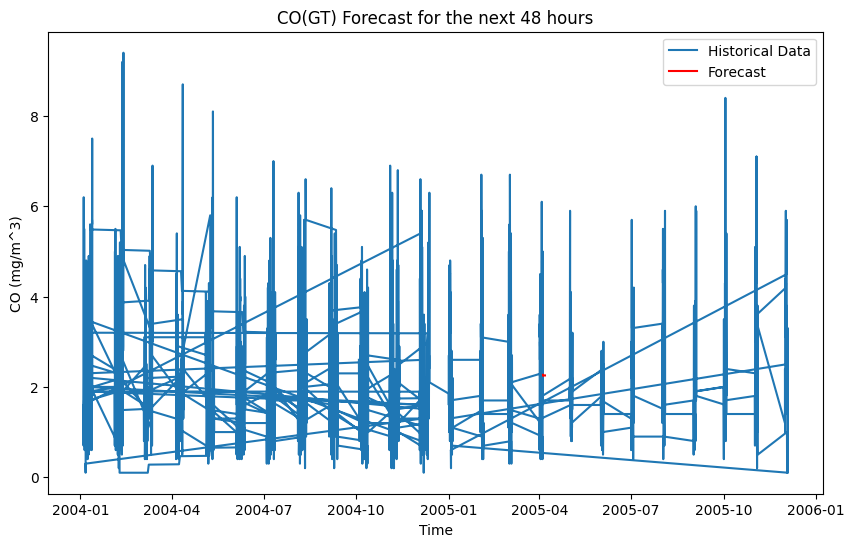

In [3]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA model (p=1, d=1, q=1 as an initial guess, you can tune the parameters)
model = ARIMA(df['CO(GT)'], order=(1, 1, 1))  # ARIMA(p, d, q)
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

# Plot residuals
model_fit.resid.plot(title='Residuals')
plt.show()

# Forecasting for the next 48 hours (for example)
forecast = model_fit.forecast(steps=48)
forecast_index = pd.date_range(df.index[-1], periods=49, freq='H')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['CO(GT)'], label='Historical Data')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('CO(GT) Forecast for the next 48 hours')
plt.xlabel('Time')
plt.ylabel('CO (mg/m^3)')
plt.show()


In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Revised datetime parsing with validation
def load_and_preprocess(file_path):
    df = pd.read_excel(file_path, dtype={'Date': str, 'Time': str})
    
    # Validate raw data format
    print("Raw columns:", df.columns.tolist())
    print("Sample Date values:", df['Date'].head().values)
    print("Sample Time values:", df['Time'].head().values)

    # Clean date/time strings
    df['Date'] = df['Date'].str.replace(r'[^0-9/]', '', regex=True)
    df['Time'] = df['Time'].str.replace(r'[^0-9.:]', '', regex=True)  # Allow colon separators
    
    # Flexible datetime parsing
    df['datetime'] = pd.to_datetime(
        df['Date'] + ' ' + df['Time'], 
        format='mixed',  # Handle multiple formats
        dayfirst=True,   # European date format
        errors='coerce'
    )
    
    # Validate datetime conversion
    print(f"\nInvalid datetime entries: {df['datetime'].isna().sum()}")
    print("Sample invalid rows:")
    print(df[df['datetime'].isna()].head())

    # Only drop rows if reasonable
    if df['datetime'].isna().mean() < 0.5:  # If <50% missing
        df = df.dropna(subset=['datetime'])
    else:
        raise ValueError("Excessive invalid datetime entries")

    df = df.set_index('datetime')
    # After handling missing values:
    df = df.ffill().bfill()
    
    # Convert all columns to numeric types
    df = df.apply(pd.to_numeric, errors='coerce')
    
    # Final validation check
    non_numeric = df.select_dtypes(exclude=[np.number]).columns
    if not non_numeric.empty:
        print(f"Non-numeric columns remaining: {list(non_numeric)}")
        df = df.drop(columns=non_numeric)
    
    return df


# Define targets and exogenous variables
targets = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 
           'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
           'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 
           'RH', 'AH']

exog_features = ['T', 'RH', 'AH']

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Basic Statistics:
                count                           mean                  min  \
Date             9357  2004-09-21 04:30:05.193972480  2004-03-10 00:00:00   
CO(GT)         9357.0                     -34.207524               -200.0   
PT08.S1(CO)    9357.0                    1048.869652               -200.0   
NMHC(GT)       9357.0                    -159.090093               -200.0   
C6H6(GT)       9357.0                       1.865576               -200.0   
PT08.S2(NMHC)  9357.0                     894.475963               -200.0   
NOx(GT)        9357.0                       168.6042               -200.0   
PT08.S3(NOx)   9357.0                     794.872333               -200.0   
NO2(GT)        9357.0                      58.135898               -200.0   
PT08.S4(NO2)   9357.0                    1391.363266               -200.0   
PT08.S5(O3)    9357.0                     974.951534               -200.0   
T              9357.0                         9.7766     

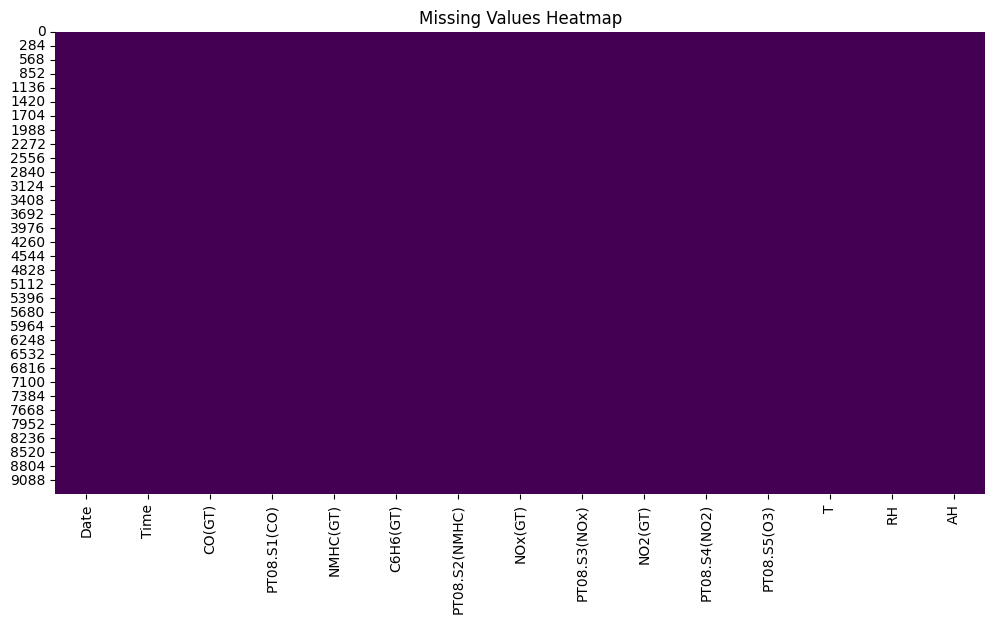

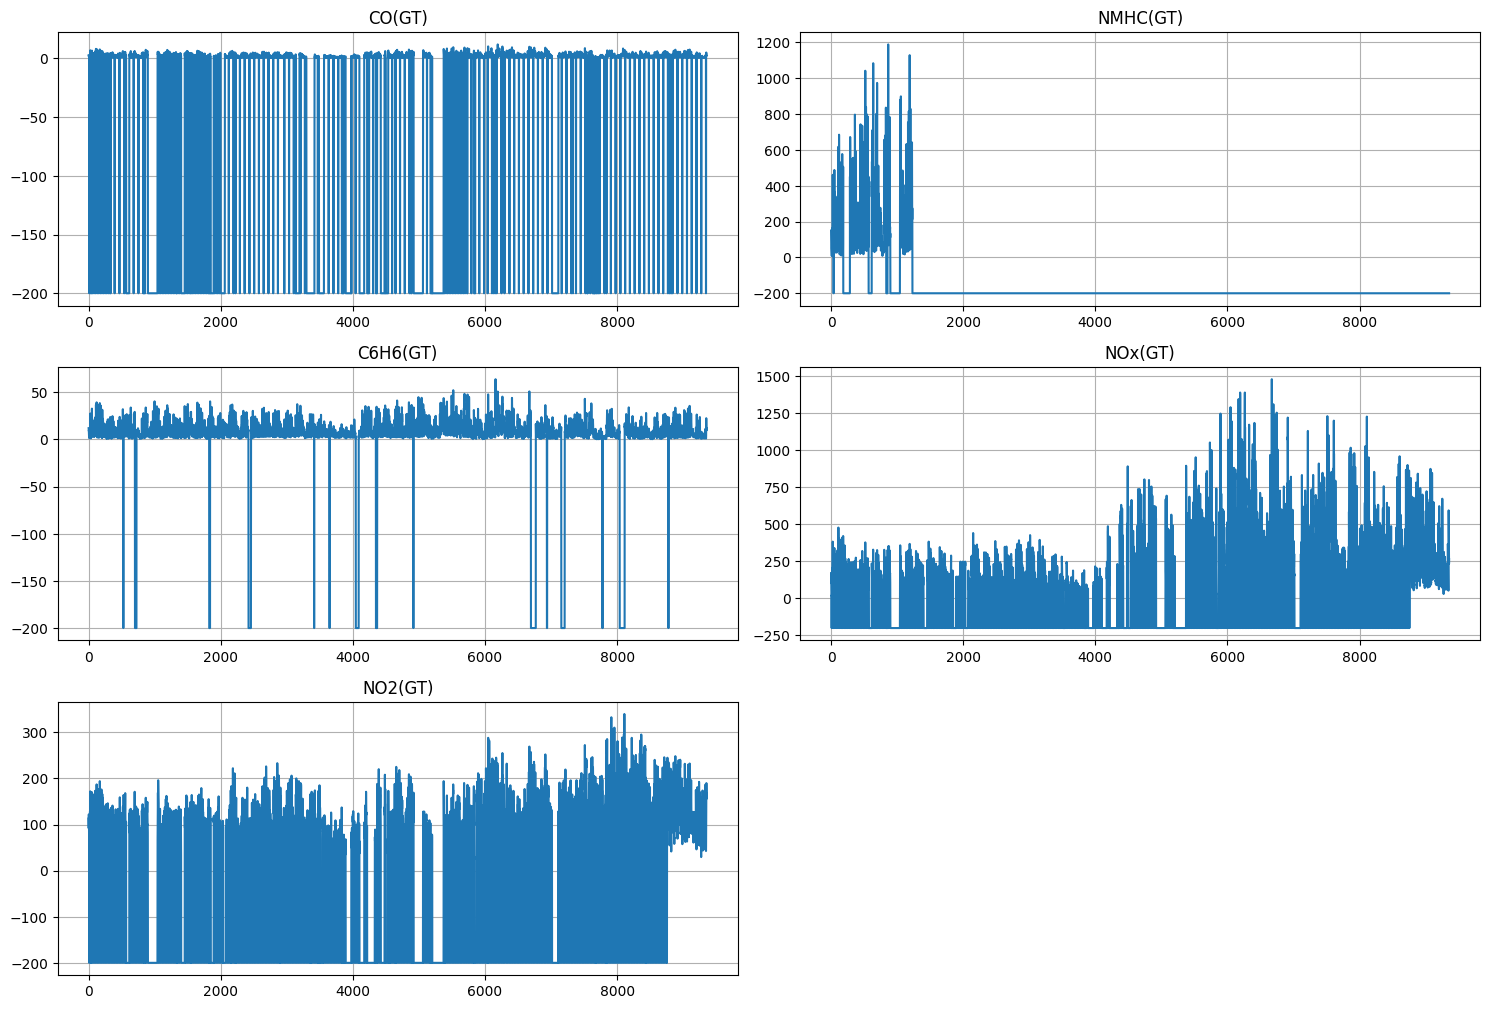

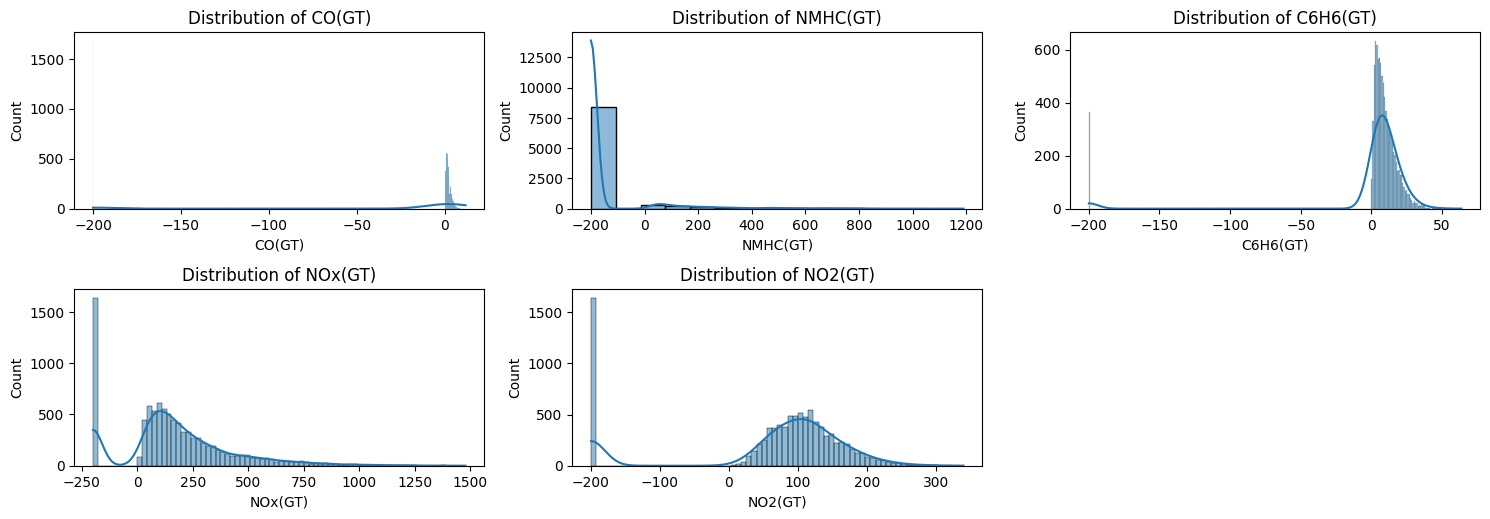

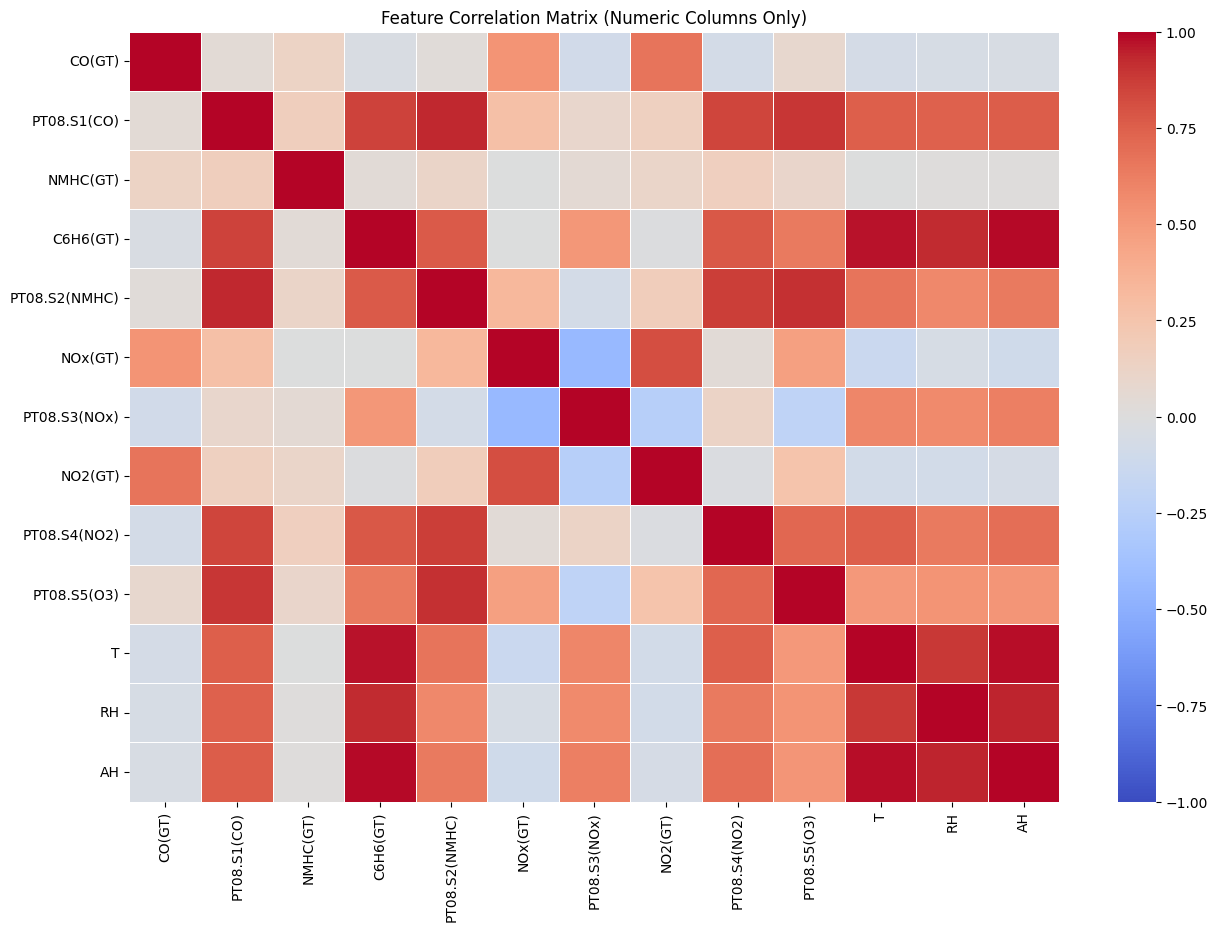

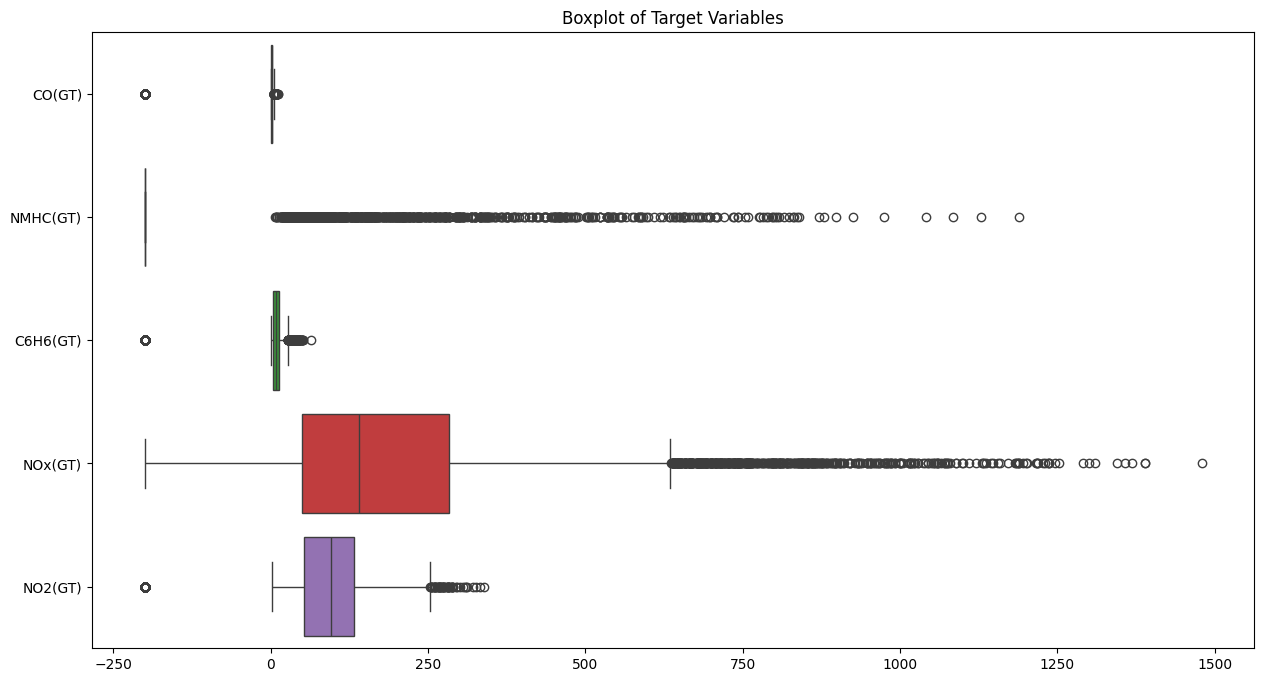

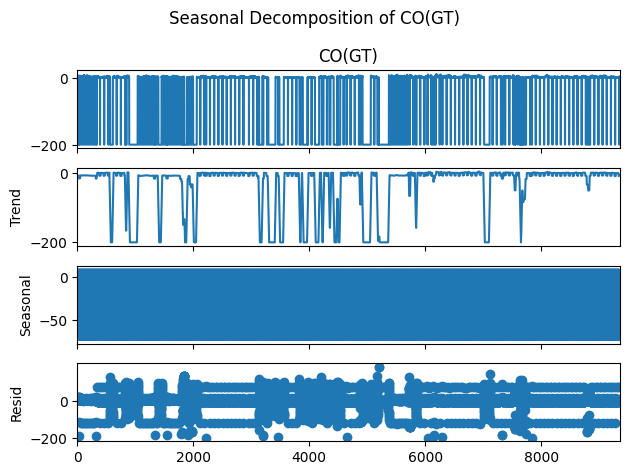

In [5]:
#%% Exploratory Data Analysis (EDA)
def perform_eda(df):
    # 1. Basic Statistics
    print("\nBasic Statistics:")
    print(df.describe().T)
    
    # 2. Missing Values Analysis
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()
    
    # 3. Time Series Visualization
    targets = [col for col in df.columns if '(GT)' in col]
    plt.figure(figsize=(15, 20))
    for i, col in enumerate(targets, 1):
        plt.subplot(6, 2, i)
        df[col].plot(title=col)
        plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # 4. Distribution Analysis
    plt.figure(figsize=(15, 10))
    for i, col in enumerate(targets, 1):
        plt.subplot(4, 3, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()
    
    # 5. Fixed Correlation Analysis
    plt.figure(figsize=(15, 10))
    
    # Select only numeric columns explicitly
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Calculate correlation matrix with proper handling
    corr_matrix = numeric_df.corr(numeric_only=True)
    
    # Filter out constant columns
    corr_matrix = corr_matrix.loc[:, (corr_matrix.nunique() > 1)]
    corr_matrix = corr_matrix.loc[(corr_matrix.nunique() > 1), :]
    
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', 
                vmin=-1, vmax=1, linewidths=0.5)
    plt.title('Feature Correlation Matrix (Numeric Columns Only)')
    plt.show()
    
    # 7. Boxplots for Outlier Detection
    plt.figure(figsize=(15, 8))
    sns.boxplot(data=df[targets], orient='h')
    plt.title('Boxplot of Target Variables')
    plt.show()
    
    # 8. Seasonal Decomposition (Example for CO(GT))
    decomposition = seasonal_decompose(df['CO(GT)'].dropna(), 
                                      period=24, model='additive')
    decomposition.plot()
    plt.suptitle('Seasonal Decomposition of CO(GT)')
    plt.tight_layout()
    plt.show()

#%% Execute Preprocessing and EDA
if __name__ == "__main__":
    # Load and preprocess data
    # Correct file path handlin

# Modify your file loading to check paths
    file_path = 'AirQualityUCI.xlsx'
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Data file not found at: {os.path.abspath(file_path)}")

    df = pd.read_excel(file_path)

    
    # Perform EDA if data loaded successfully
    if df is not None:
        perform_eda(df)
    else:
        print("Failed to load and preprocess data")

In [10]:
def forecast_models(df, targets, exog_features, steps=48):
    results = {}
    
    # Validate features exist
    missing_exog = [f for f in exog_features if f not in df.columns]
    if missing_exog:
        raise ValueError(f"Missing exogenous features: {missing_exog}")
    
    for target in targets:
        print(f"\nProcessing {target}...")
        
        # Split data
        train = df[:-steps]
        test = df[-steps:]
        
        # SARIMAX Model
        try:
            sarimax_model = auto_arima(
                train[target],
                exogenous=train[exog_features],
                seasonal=True,
                m=6,
                # Reduce search space
                start_p=0, max_p=2,
                start_q=0, max_q=2,
                d=1,  # Fix differencing order
                D=1,  # Fix seasonal differencing
                trace=True,
                error_action='ignore',
                suppress_warnings=True
            )
            sarimax_forecast = sarimax_model.predict(
                n_periods=steps,
                exogenous=test[exog_features]
            )
        except Exception as e:
            print(f"SARIMAX failed for {target}: {str(e)}")
            sarimax_forecast = np.full(steps, np.nan)
        
        # Prophet Model
        try:
            # Create prophet dataframe with proper datetime handling
            prophet_df = train.reset_index()[['datetime'] + [target] + exog_features]
            prophet_df = prophet_df.rename(columns={'datetime': 'ds', target: 'y'})
            
            # Convert to numeric types
            prophet_df = prophet_df.apply(pd.to_numeric, errors='coerce')
            prophet_df['ds'] = pd.to_datetime(prophet_df['ds'], unit='ns')
            
            # Initialize and fit model
            prophet_model = Prophet(
                yearly_seasonality=False,
                weekly_seasonality=True,
                daily_seasonality=True,
                # Reduce complexity
                seasonality_prior_scale=0.1,
                holidays_prior_scale=0.05
            )
            for feature in exog_features:
                prophet_model.add_regressor(feature)
                
            prophet_model.fit(prophet_df)
            
            # Create future dataframe
            future = prophet_model.make_future_dataframe(
                periods=steps, 
                freq='H',
                include_history=False
            )
            
            # Add exogenous variables
            future[exog_features] = test[exog_features].values
            
            # Generate forecast
            prophet_forecast = prophet_model.predict(future)['yhat'].values
        except Exception as e:
            print(f"Prophet failed for {target}: {str(e)}")
            prophet_forecast = np.full(steps, np.nan)
        
        # Store results
        results[target] = {
            'SARIMAX': sarimax_forecast,
            'Prophet': prophet_forecast,
            'Actual': test[target]
        }
        
    return results

# Corrected target definitions
targets = ['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 
           'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)',
           'PT08.S4(NO2)', 'PT08.S5(O3)']

exog_features = ['T', 'RH', 'AH']
# Load and preprocess data
df = load_and_preprocess('AirQualityUCI.xlsx')

# Generate forecasts
#forecasts = forecast_models(df, targets, exog_features)


Raw columns: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
Sample Date values: ['2004-03-10 00:00:00' '2004-03-10 00:00:00' '2004-03-10 00:00:00'
 '2004-03-10 00:00:00' '2004-03-10 00:00:00']
Sample Time values: ['18:00:00' '19:00:00' '20:00:00' '21:00:00' '22:00:00']

Invalid datetime entries: 0
Sample invalid rows:
Empty DataFrame
Columns: [Date, Time, CO(GT), PT08.S1(CO), NMHC(GT), C6H6(GT), PT08.S2(NMHC), NOx(GT), PT08.S3(NOx), NO2(GT), PT08.S4(NO2), PT08.S5(O3), T, RH, AH, datetime]
Index: []

Processing CO(GT)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=2.22 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=101598.586, Time=0.15 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=97392.483, Time=0.93 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=4.97 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=100087.417

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
22:57:06 - cmdstanpy - INFO - Chain [1] start processing
22:57:06 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(



Processing PT08.S1(CO)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=2.74 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=124269.695, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=120544.880, Time=1.21 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=2.39 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=124049.077, Time=0.21 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=119775.206, Time=2.60 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=7.24 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=3.02 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=119876.726, Time=0.97 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=119767.835, Time=3.90 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=120538.641, Time=2.23 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=10.20 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=5.70 sec
 ARIMA(2,1,1)(2,1,0)[6]             : AIC=inf, Time=19.61 sec
 ARIMA(1,1,1)(2,1,0)[6]  

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
22:58:35 - cmdstanpy - INFO - Chain [1] start processing
22:58:36 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(



Processing NMHC(GT)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=1.78 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=104660.329, Time=0.14 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=101298.391, Time=1.38 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=4.09 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=104540.599, Time=0.17 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=100335.188, Time=2.98 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=13.84 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=7.20 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=100403.210, Time=1.10 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=100111.727, Time=4.52 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=100997.964, Time=2.80 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=22.96 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=12.15 sec
 ARIMA(2,1,1)(2,1,0)[6]             : AIC=inf, Time=21.45 sec
 ARIMA(1,1,1)(2,1,0)[6]   

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
23:00:40 - cmdstanpy - INFO - Chain [1] start processing
23:00:42 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(



Processing C6H6(GT)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=2.72 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=80998.464, Time=0.18 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=78097.303, Time=1.05 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=3.94 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=80942.428, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=77059.475, Time=2.36 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=9.25 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=4.33 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=77143.970, Time=1.67 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=77061.088, Time=3.11 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=14.50 sec
 ARIMA(0,1,1)(2,1,0)[6]             : AIC=77058.494, Time=2.14 sec
 ARIMA(0,1,1)(1,1,0)[6]             : AIC=78098.242, Time=1.35 sec
 ARIMA(0,1,1)(2,1,1)[6]             : AIC=inf, Time=8.44 sec
 ARIMA(0,1,1)(1,1,1)[6]       

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
23:01:59 - cmdstanpy - INFO - Chain [1] start processing
23:02:00 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(



Processing PT08.S2(NMHC)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=3.30 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=127323.261, Time=0.15 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=123392.822, Time=1.37 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=3.10 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=126890.309, Time=0.17 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=122586.658, Time=3.01 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=8.04 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=7.54 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=122880.774, Time=0.85 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=122558.915, Time=4.14 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=123359.322, Time=2.60 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=11.28 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=5.71 sec
 ARIMA(2,1,1)(2,1,0)[6]             : AIC=inf, Time=13.09 sec
 ARIMA(1,1,1)(2,1,0)[6]

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
23:03:20 - cmdstanpy - INFO - Chain [1] start processing
23:03:21 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(



Processing NOx(GT)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=3.58 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=123620.870, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=119874.751, Time=1.52 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=3.07 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=123610.493, Time=0.15 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=119118.634, Time=3.45 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=8.22 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=3.86 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=119203.812, Time=0.86 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=119119.657, Time=4.73 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=17.01 sec
 ARIMA(0,1,1)(2,1,0)[6]             : AIC=119117.309, Time=3.87 sec
 ARIMA(0,1,1)(1,1,0)[6]             : AIC=119872.344, Time=1.99 sec
 ARIMA(0,1,1)(2,1,1)[6]             : AIC=inf, Time=12.59 sec
 ARIMA(0,1,1)(1,1,1)[6

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
23:04:59 - cmdstanpy - INFO - Chain [1] start processing
23:05:00 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(



Processing PT08.S3(NOx)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=3.99 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=123147.264, Time=0.21 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=118976.618, Time=1.71 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=3.24 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=122449.560, Time=0.15 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=118159.999, Time=3.17 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=9.32 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=4.18 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=118655.903, Time=1.05 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=118161.997, Time=4.59 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=118161.998, Time=5.39 sec
 ARIMA(0,1,1)(2,1,0)[6]             : AIC=118197.315, Time=2.91 sec
 ARIMA(2,1,1)(2,1,0)[6]             : AIC=inf, Time=21.87 sec
 ARIMA(1,1,0)(2,1,0)[6] intercept   : AIC=118161.998, Time=8.76 sec

Best model

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
23:06:11 - cmdstanpy - INFO - Chain [1] start processing
23:06:12 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(



Processing NO2(GT)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=3.04 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=113960.135, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=109432.024, Time=1.50 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=3.54 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=112671.496, Time=0.20 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=108536.024, Time=3.51 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=14.18 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=11.38 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=110030.217, Time=1.47 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=108287.708, Time=4.85 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=109133.310, Time=2.96 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=14.28 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=6.22 sec
 ARIMA(2,1,1)(2,1,0)[6]             : AIC=inf, Time=26.46 sec
 ARIMA(1,1,1)(2,1,0)[6]    

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
23:08:25 - cmdstanpy - INFO - Chain [1] start processing
23:08:25 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(



Processing PT08.S4(NO2)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=6.05 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=129322.320, Time=0.18 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=125664.119, Time=2.56 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=4.26 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=129145.170, Time=0.21 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=124824.731, Time=3.62 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=10.45 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=4.41 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=124913.727, Time=1.24 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=124757.336, Time=5.65 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=125582.793, Time=3.44 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=15.98 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=7.11 sec
 ARIMA(2,1,1)(2,1,0)[6]             : AIC=inf, Time=15.39 sec
 ARIMA(1,1,1)(2,1,0)[6]

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
23:10:16 - cmdstanpy - INFO - Chain [1] start processing
23:10:17 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(



Processing PT08.S5(O3)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=5.09 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=132226.332, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=127686.650, Time=2.08 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=5.04 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=131418.562, Time=0.23 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=127014.329, Time=4.40 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=10.33 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=3.95 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=127388.527, Time=1.14 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=126997.492, Time=5.56 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=127659.487, Time=3.21 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=15.10 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=10.11 sec
 ARIMA(2,1,1)(2,1,0)[6]             : AIC=inf, Time=17.64 sec
 ARIMA(1,1,1)(2,1,0)[6]

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
23:12:06 - cmdstanpy - INFO - Chain [1] start processing
23:12:07 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


ValueError: too many values to unpack (expected 2)

In [11]:
forecasts = forecast_models(df, targets, exog_features)


Processing CO(GT)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=2.16 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=101598.586, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=97392.483, Time=0.83 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=4.07 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=100087.417, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=96345.397, Time=2.36 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=5.55 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=3.24 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=97844.695, Time=1.08 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=95986.472, Time=3.36 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=97023.709, Time=1.81 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=8.38 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=3.88 sec
 ARIMA(2,1,1)(2,1,0)[6]             : AIC=inf, Time=16.45 sec
 ARIMA(1,1,1)(2,1,0)[6]             

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
23:18:50 - cmdstanpy - INFO - Chain [1] start processing
23:18:50 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(



Processing PT08.S1(CO)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=2.85 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=124269.695, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=120544.880, Time=1.13 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=2.66 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=124049.077, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=119775.206, Time=2.82 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=7.31 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=2.98 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=119876.726, Time=1.05 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=119767.835, Time=3.56 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=120538.641, Time=2.04 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=9.54 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=5.10 sec
 ARIMA(2,1,1)(2,1,0)[6]             : AIC=inf, Time=18.53 sec
 ARIMA(1,1,1)(2,1,0)[6]   

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
23:20:14 - cmdstanpy - INFO - Chain [1] start processing
23:20:15 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(



Processing NMHC(GT)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=1.71 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=104660.329, Time=0.16 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=101298.391, Time=1.11 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=3.48 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=104540.599, Time=0.14 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=100335.188, Time=2.37 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=11.86 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=5.70 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=100403.210, Time=0.92 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=100111.727, Time=3.52 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=100997.964, Time=2.26 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=17.39 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=10.57 sec
 ARIMA(2,1,1)(2,1,0)[6]             : AIC=inf, Time=16.37 sec
 ARIMA(1,1,1)(2,1,0)[6]   

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
23:21:59 - cmdstanpy - INFO - Chain [1] start processing
23:22:01 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(



Processing C6H6(GT)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=2.45 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=80998.464, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=78097.303, Time=0.92 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=3.71 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=80942.428, Time=0.20 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=77059.475, Time=2.34 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=7.66 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=3.75 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=77143.970, Time=1.50 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=77061.088, Time=3.01 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=14.05 sec
 ARIMA(0,1,1)(2,1,0)[6]             : AIC=77058.494, Time=2.39 sec
 ARIMA(0,1,1)(1,1,0)[6]             : AIC=78098.242, Time=1.01 sec
 ARIMA(0,1,1)(2,1,1)[6]             : AIC=inf, Time=7.69 sec
 ARIMA(0,1,1)(1,1,1)[6]       

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
23:23:12 - cmdstanpy - INFO - Chain [1] start processing
23:23:13 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(



Processing PT08.S2(NMHC)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=3.39 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=127323.261, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=123392.822, Time=1.26 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=3.03 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=126890.309, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=122586.658, Time=2.89 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=8.31 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=7.05 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=122880.774, Time=0.92 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=122558.915, Time=3.82 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=123359.322, Time=2.35 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=12.12 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=5.49 sec
 ARIMA(2,1,1)(2,1,0)[6]             : AIC=inf, Time=11.38 sec
 ARIMA(1,1,1)(2,1,0)[6]

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
23:24:34 - cmdstanpy - INFO - Chain [1] start processing
23:24:34 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(



Processing NOx(GT)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=3.31 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=123620.870, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=119874.751, Time=1.57 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=3.63 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=123610.493, Time=0.13 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=119118.634, Time=3.41 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=7.55 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=3.44 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=119203.812, Time=0.90 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=119119.657, Time=4.05 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=inf, Time=12.21 sec
 ARIMA(0,1,1)(2,1,0)[6]             : AIC=119117.309, Time=3.18 sec
 ARIMA(0,1,1)(1,1,0)[6]             : AIC=119872.344, Time=1.60 sec
 ARIMA(0,1,1)(2,1,1)[6]             : AIC=inf, Time=8.87 sec
 ARIMA(0,1,1)(1,1,1)[6]

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
23:25:55 - cmdstanpy - INFO - Chain [1] start processing
23:25:56 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(



Processing PT08.S3(NOx)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=3.29 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=123147.264, Time=0.13 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=118976.618, Time=1.45 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=2.46 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=122449.560, Time=0.15 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=118159.999, Time=2.69 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=7.69 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=3.63 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=118655.903, Time=0.87 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=118161.997, Time=4.07 sec
 ARIMA(1,1,1)(2,1,0)[6]             : AIC=118161.998, Time=5.15 sec
 ARIMA(0,1,1)(2,1,0)[6]             : AIC=118197.315, Time=2.83 sec
 ARIMA(2,1,1)(2,1,0)[6]             : AIC=inf, Time=19.34 sec
 ARIMA(1,1,0)(2,1,0)[6] intercept   : AIC=118161.998, Time=7.65 sec

Best model

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
23:26:58 - cmdstanpy - INFO - Chain [1] start processing
23:26:59 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(



Processing NO2(GT)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=2.93 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=113960.135, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=109432.024, Time=1.52 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=3.29 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=112671.496, Time=0.19 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=108536.024, Time=3.09 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=9.18 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=7.76 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=110030.217, Time=1.03 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=108287.708, Time=4.20 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=109133.310, Time=2.31 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=10.78 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=5.48 sec
 ARIMA(2,1,1)(2,1,0)[6]             : AIC=inf, Time=21.18 sec
 ARIMA(1,1,1)(2,1,0)[6]      

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
23:28:40 - cmdstanpy - INFO - Chain [1] start processing
23:28:41 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(



Processing PT08.S4(NO2)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=3.96 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=129322.320, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=125664.119, Time=1.41 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=2.74 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=129145.170, Time=0.18 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=124824.731, Time=2.94 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=8.42 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=3.72 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=124913.727, Time=0.82 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=124757.336, Time=4.97 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=125582.793, Time=2.58 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=12.60 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=5.84 sec
 ARIMA(2,1,1)(2,1,0)[6]             : AIC=inf, Time=13.92 sec
 ARIMA(1,1,1)(2,1,0)[6] 

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
23:30:14 - cmdstanpy - INFO - Chain [1] start processing
23:30:16 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(



Processing PT08.S5(O3)...
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[6]             : AIC=inf, Time=3.94 sec
 ARIMA(0,1,0)(0,1,0)[6]             : AIC=132226.332, Time=0.13 sec
 ARIMA(1,1,0)(1,1,0)[6]             : AIC=127686.650, Time=1.78 sec
 ARIMA(0,1,1)(0,1,1)[6]             : AIC=inf, Time=3.82 sec
 ARIMA(1,1,0)(0,1,0)[6]             : AIC=131418.562, Time=0.23 sec
 ARIMA(1,1,0)(2,1,0)[6]             : AIC=127014.329, Time=3.79 sec
 ARIMA(1,1,0)(2,1,1)[6]             : AIC=inf, Time=9.35 sec
 ARIMA(1,1,0)(1,1,1)[6]             : AIC=inf, Time=3.49 sec
 ARIMA(0,1,0)(2,1,0)[6]             : AIC=127388.527, Time=1.00 sec
 ARIMA(2,1,0)(2,1,0)[6]             : AIC=126997.492, Time=4.82 sec
 ARIMA(2,1,0)(1,1,0)[6]             : AIC=127659.487, Time=2.75 sec
 ARIMA(2,1,0)(2,1,1)[6]             : AIC=inf, Time=13.04 sec
 ARIMA(2,1,0)(1,1,1)[6]             : AIC=inf, Time=7.18 sec
 ARIMA(2,1,1)(2,1,0)[6]             : AIC=inf, Time=14.51 sec
 ARIMA(1,1,1)(2,1,0)[6]  

/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
23:31:45 - cmdstanpy - INFO - Chain [1] start processing
23:31:46 - cmdstanpy - INFO - Chain [1] done processing
/Users/mohana25/Library/Python/3.9/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


In [12]:
def make_future_dataframe(df, periods=48):
    """
    Create a DataFrame for the next `periods` hours after the last timestamp in df.
    Fills exogenous features with last known values.
    """
    last_dt = df.index[-1]
    future_datetimes = pd.date_range(start=last_dt + pd.Timedelta(hours=1), periods=periods, freq='H')
    future_df = pd.DataFrame(index=future_datetimes)
    future_df['Date'] = future_df.index.strftime('%d/%m/%Y')
    future_df['Time'] = future_df.index.strftime('%H.%M.%S')
    # Fill exogenous features with last known values (or use another strategy)
    for col in ['T', 'RH', 'AH']:
        if col in df.columns:
            future_df[col] = df[col].iloc[-1]
        else:
            future_df[col] = np.nan
    return future_df

def export_forecasts(forecasts, future_df, file_name):
    # Original column order
    original_columns = [
        'Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
        'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 
        'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH'
    ]
    
    # Prepare forecast DataFrames
    sarimax_df = future_df[['Date', 'Time', 'T', 'RH', 'AH']].copy()
    prophet_df = future_df[['Date', 'Time', 'T', 'RH', 'AH']].copy()
    
    # Insert predictions for each target
    for target in forecasts.keys():
        sarimax_df[target] = forecasts[target]['SARIMAX']
        prophet_df[target] = forecasts[target]['Prophet']
    
    # Reorder columns to match original structure
    sarimax_df = sarimax_df.reindex(columns=original_columns)
    prophet_df = prophet_df.reindex(columns=original_columns)
    
    # Export to Excel
    with pd.ExcelWriter(file_name) as writer:
        sarimax_df.to_excel(writer, sheet_name='SARIMAX_Forecast', index=False)
        prophet_df.to_excel(writer, sheet_name='Prophet_Forecast', index=False)

future_df = make_future_dataframe(df, periods=48)

export_forecasts(forecasts, future_df, 'future_forecast_results.xlsx')


/var/folders/8j/2bschcy91hl2lzf_yf5v4gb00000gn/T/ipykernel_5139/1429285295.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_datetimes = pd.date_range(start=last_dt + pd.Timedelta(hours=1), periods=periods, freq='H')


In [13]:
## Define validation criteria 
criteria = {
    'CO(GT)': 10,
    'PT08.S1(CO)': 210,
    'NMHC(GT)': 14,
    'C6H6(GT)': 6,
    'PT08.S2(NMHC)': 250,
    'NOx(GT)': 190,
    'PT08.S3(NOx)': 196.0619,
    'NO2(GT)': 120,
    'PT08.S4(NO2)': 300.7,
    'PT08.S5(O3)': 400.25,
    'T': 12,          # Temperature
    'RH': 18,         # Relative Humidity
    'AH': 7           # Absolute Humidity
}

validation_results = []

for target, data in forecasts.items():
    # Calculate RMSE
    sarimax_rmse = np.sqrt(mean_squared_error(data['Actual'], data['SARIMAX']))
    prophet_rmse = np.sqrt(mean_squared_error(data['Actual'], data['Prophet']))
    
    # Get criterion threshold (use infinity if not found)
    threshold = criteria.get(target, np.inf)
    
    validation_results.append({
        'Target': target,
        'SARIMAX_RMSE': sarimax_rmse,
        'SARIMAX_Pass': sarimax_rmse <= threshold,
        'Prophet_RMSE': prophet_rmse,
        'Prophet_Pass': prophet_rmse <= threshold,
        'Threshold': threshold
    })

# Create and format DataFrame
validation_df = pd.DataFrame(validation_results)
validation_df = validation_df[[
    'Target', 'Threshold', 'SARIMAX_RMSE', 'SARIMAX_Pass',
    'Prophet_RMSE', 'Prophet_Pass'
]]

print("\nValidation Results:")
print(validation_df.to_string(index=False))

# Summary statistics
print("\nModels Meeting Criteria:")
print(f"SARIMAX: {validation_df['SARIMAX_Pass'].sum()}/{len(validation_df)} targets passed")
print(f"Prophet: {validation_df['Prophet_Pass'].sum()}/{len(validation_df)} targets passed")



Validation Results:
       Target  Threshold  SARIMAX_RMSE  SARIMAX_Pass  Prophet_RMSE  Prophet_Pass
       CO(GT)    10.0000     28.883895         False     35.607799         False
  PT08.S1(CO)   210.0000    139.930218          True    209.624170          True
     NMHC(GT)    14.0000      0.000000          True     43.777552         False
     C6H6(GT)     6.0000      6.337626         False      6.370740         False
PT08.S2(NMHC)   250.0000    242.754258          True    273.334615         False
      NOx(GT)   190.0000    216.593715         False    215.193522         False
 PT08.S3(NOx)   196.0619    259.425584         False    218.866429         False
      NO2(GT)   120.0000    130.200822         False     82.510716          True
 PT08.S4(NO2)   300.7000    228.665928          True    256.169568          True
  PT08.S5(O3)   400.2500    645.934831         False    426.730506         False

Models Meeting Criteria:
SARIMAX: 4/10 targets passed
Prophet: 3/10 targets passed
